In [1]:
# European Centre for Disease Control
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

ageData = dt.timedelta(hours=1, minutes=0)
startTime = dt.datetime.now()

try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print('Data already loaded')
except:
    load = True

if load:
    # this is where we read the data from
    print('Loading Data')
    df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")
    print('Data Loaded')
    dataStamp = dt.datetime.today()

Loading Data
Data Loaded


In [2]:
# Load the function, issue default of United Kingdom

def get_country(country = 'United_Kingdom'):
    df1 = df.loc[df['countriesAndTerritories'] == country][['countriesAndTerritories', 'dateRep', 'cases', 'deaths']]    # Take just the columns we want
    #df1['dateRep'] = pd.to_datetime(df['dateRep'])
    df1['dateRep'] = df1.apply(lambda row: pd.to_datetime(row['dateRep'], dayfirst = True), axis=1)    # Convert the date string to valid date data
    df1.sort_values(by = 'dateRep', inplace = True)    # Sort the data incase
    df1['cases'] = df1['cases'].apply(lambda x: x if x > 0 else 0 )    # Some countries have dodgy negative values - set them to Zero
    df1['cases_7_days'] = df1.iloc[:,2].rolling(window=7).mean()    # This adds the rolling 7 day average
    df1['deaths'] = df1['deaths'].apply(lambda x: x if x > 0 else 0 )    # Some countries have dodgy negative values - set them to Zero
    df1['deaths_7_days'] = df1.iloc[:,3].rolling(window=7).mean()    # add the 7 day rolling average
    df1['cases_stdev'] = df1.iloc[:,2].rolling(window=21).std()    # get the standard deviation 
    df1['deaths_stdev'] = df1.iloc[:,3].rolling(window=21).std()    # get the standard deviation
    return df1    # Return the dataframe
#df1 = get_country('Germany')
#df1 = get_country()
#df1[-30:]
print('Function Loaded')

Function Loaded


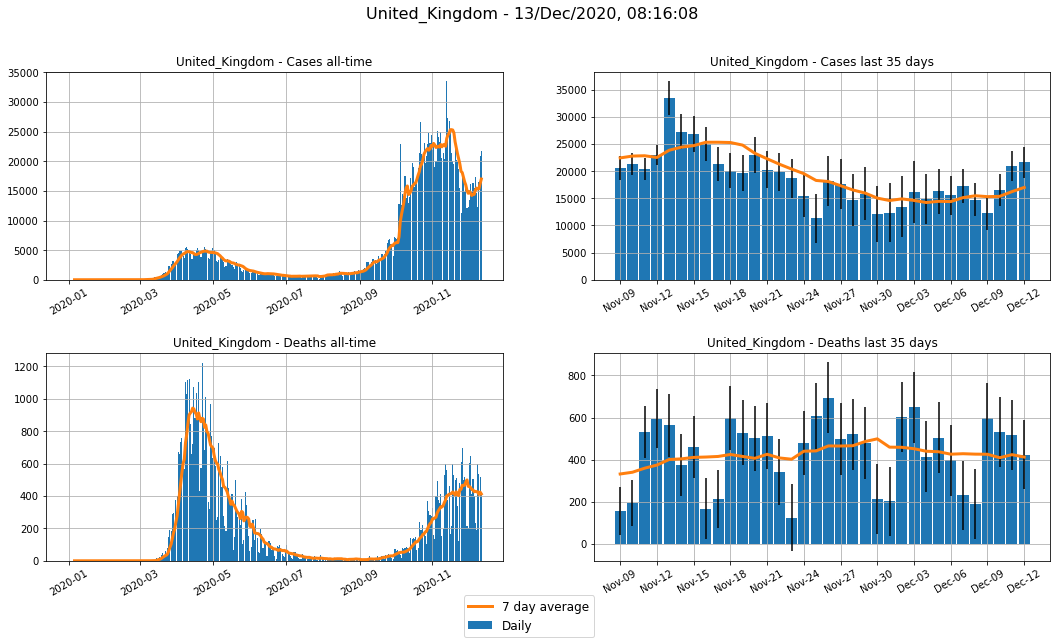

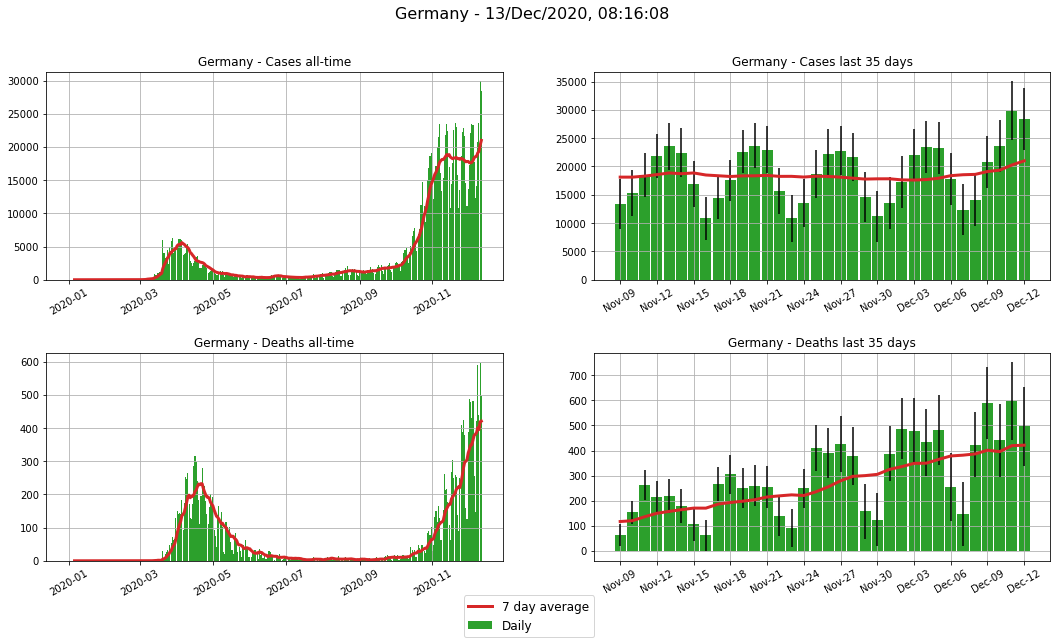

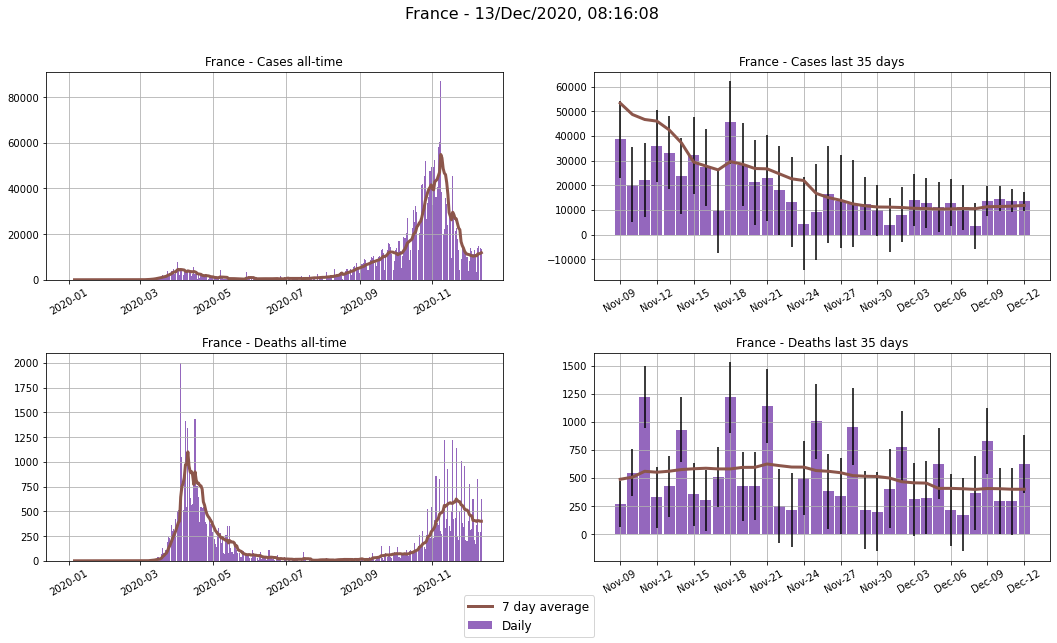

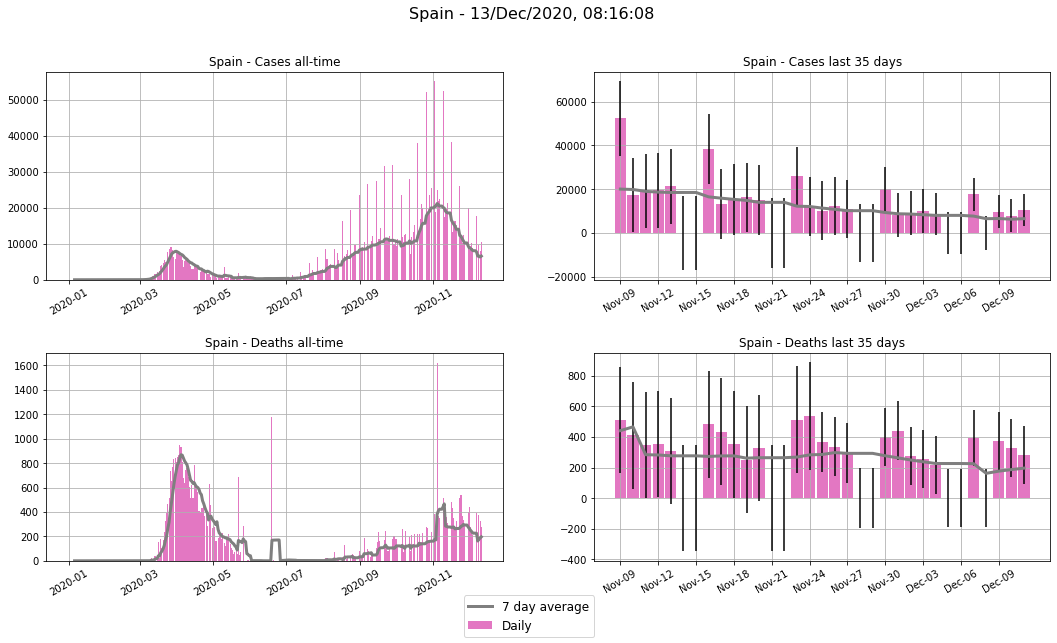

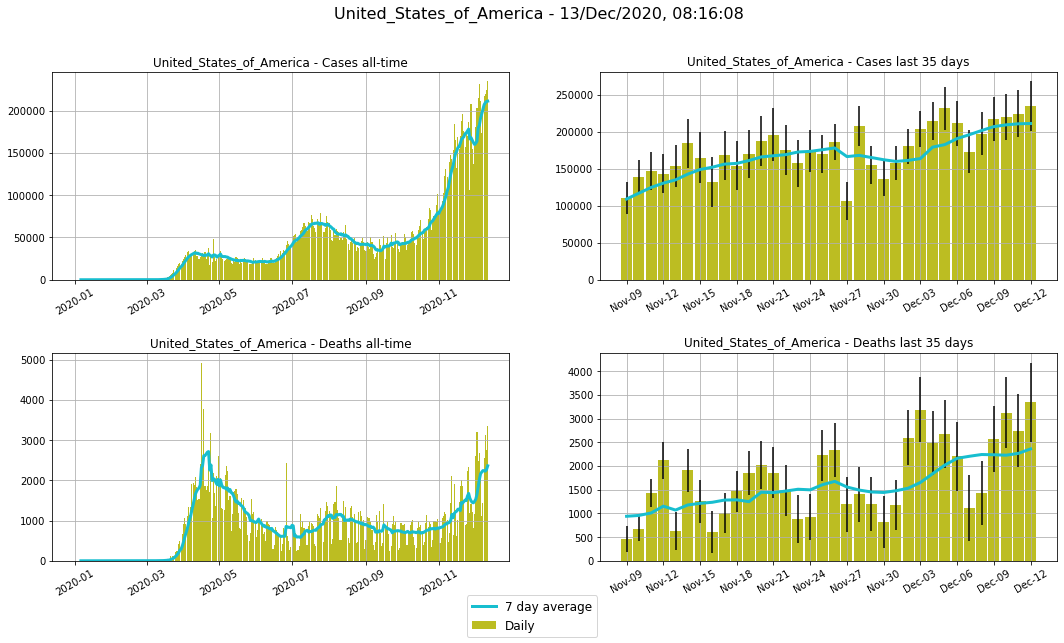

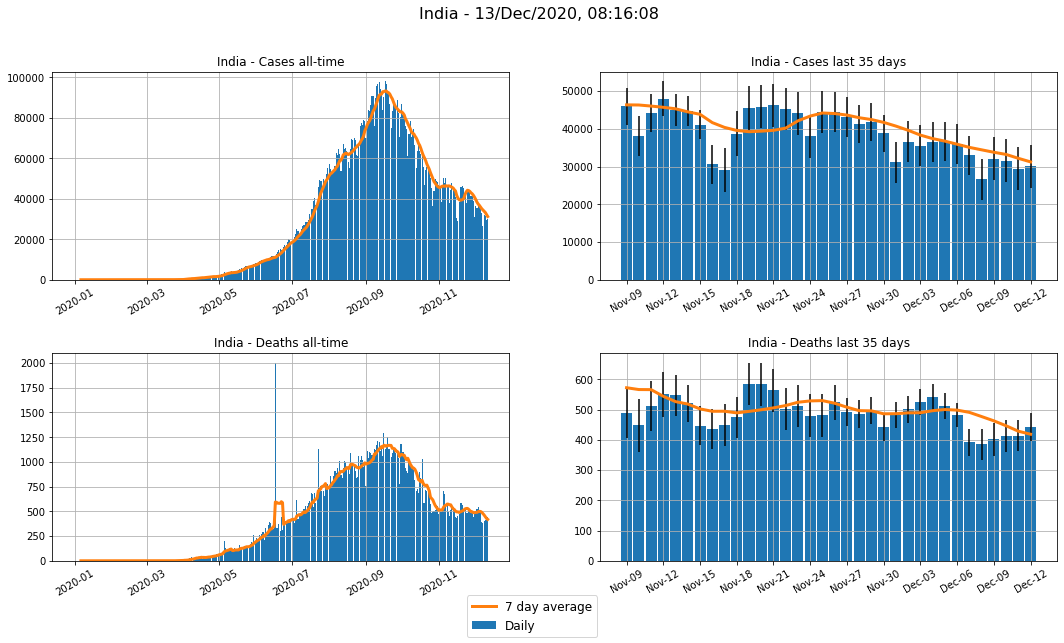

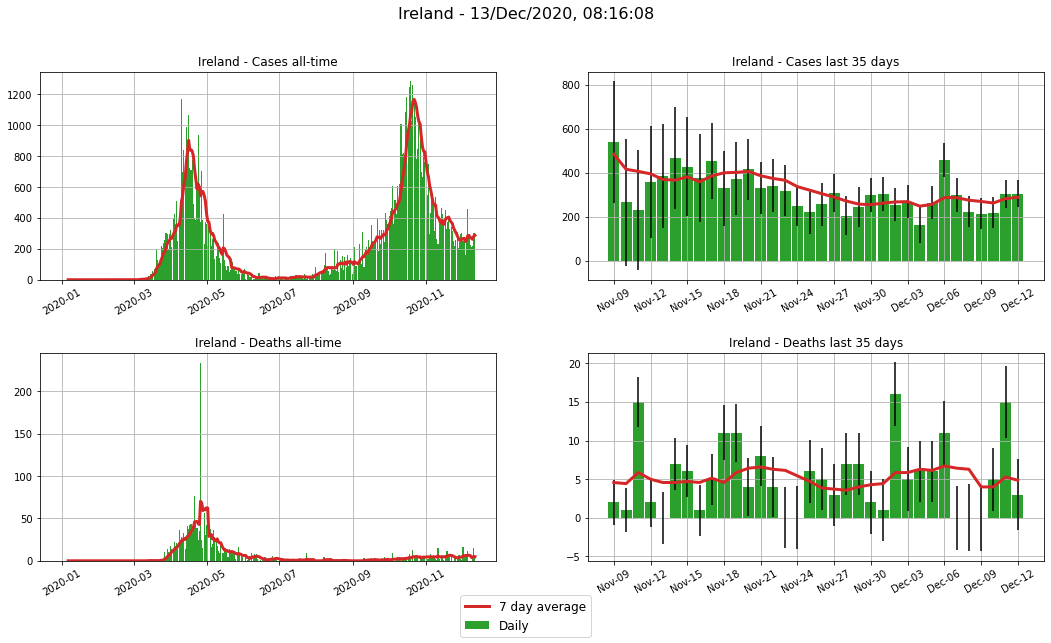

In [3]:
i = 0    # counter for colors
j = 1    # counter for colors
w = 0.9    # width of bars
d = 35    # number of days for the right hand charts
xrot = 30    # number of degrees to rotatet eh xticks

dataTime = dataStamp.strftime("%d/%b/%Y, %H:%M:%S")

# Now we are going to loop through the list of countries and create 4 charts and an image file for each. 
for country in ['United_Kingdom', 'Germany', 'France', 'Spain', 'United_States_of_America',
                'India', 'Ireland']:

    df1 = get_country(country)    # Get the country data
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,2)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing

    plt.subplot(221)    # position top left
    plt.grid('on')    # turn on grid lines
    plt.xticks(rotation=xrot)    # rotate the xticks values to make them readable
    plt.bar('dateRep', 'cases', color='C{}'.format(i%10), data=df1, width=w)    # Create the bar values for the daily data
    plt.plot('dateRep', 'cases_7_days', color='C{}'.format(j%10), data=df1, linewidth=3)    # Draw the line on top
    plt.title('{} - Cases all-time'.format(country))    # Set the title
    
    plt.subplot(223)    # position bottom left
    plt.grid('on')    # turn on grid lines
    plt.xticks(rotation=xrot)    # rotate the xticks values to make them readable
    plt.bar('dateRep', 'deaths', color='C{}'.format((i)%10), data=df1, width=w)
    plt.plot('dateRep', 'deaths_7_days', color='C{}'.format((j)%10), data=df1, linewidth=3)
    plt.title('{} - Deaths all-time'.format(country))
    
    df1 = df1.loc[df1['dateRep'] > pd.to_datetime('today') - pd.offsets.DateOffset(days=d)]    # this cuts the last d days for more recent data view
    x = []    # create an empty list for the x values
    for day in df1.dateRep.tolist():    # now for each one convert the timestamp to a string
        x.append(day.strftime('%b-%d'))    # string formatting

    plt.subplot(222)    # position top right
    plt.grid('on')    # turn on grid lines

    y1 = df1.cases.tolist()    # set the Y values
    y2 = df1.cases_7_days.tolist()    # set the Y values
    ystd = df1.cases_stdev.tolist()    # set the error marging the standard deviation value

    plt.bar(x,y1, color='C{}'.format((i)%10), width=w, yerr=ystd)    # plot the x and y1, with color and width
    plt.xticks(x[::3], rotation=30)    # Show ticks every 3 days
    plt.plot(x,y2, color='C{}'.format((j)%10), linewidth=3)    # plot the x and y2, with color and line thickness
    plt.title('{} - Cases last {} days'.format(country, d))

    plt.subplot(224)    # position bottom right
    plt.grid('on')    # turn on grid lines
 
    y1 = df1.deaths.tolist()    # set the Y values
    y2 = df1.deaths_7_days.tolist()    # set the Y values
    ystd = df1.deaths_stdev.tolist()    # set the error marging the standard deviation value

    plt.bar(x,y1, color='C{}'.format((i)%10), width=w, yerr=ystd)    # plot the x and y1, with color and width
    plt.xticks(x[::3], rotation=30)    # Show ticks every 3 days
    plt.plot(x,y2, color='C{}'.format((j)%10), linewidth=3)    # plot the x and y2, with color and line thickness
    plt.title('{} - Deaths last {} days'.format(country, d))    # set the title
    
    fig.legend(['7 day average', 'Daily'], fontsize=12, loc=8)    # set the legend on
    fig.suptitle('{} - {}'.format(country,dataTime), fontsize=16)
    i += 2    # move the color counter
    j += 2    # move the color counter
    plt.show()    # show the result
    
    fig.savefig('{}.png'.format(country))    # save the image file of the charts

In [4]:
x
dates = []
for day in df1.dateRep[::3]:
#    print(day.strftime('%Y-%b-%d'))
    dates.append(day.strftime('%Y-%b-%d'))
dates
x

['Nov-09',
 'Nov-10',
 'Nov-11',
 'Nov-12',
 'Nov-13',
 'Nov-14',
 'Nov-15',
 'Nov-16',
 'Nov-17',
 'Nov-18',
 'Nov-19',
 'Nov-20',
 'Nov-21',
 'Nov-22',
 'Nov-23',
 'Nov-24',
 'Nov-25',
 'Nov-26',
 'Nov-27',
 'Nov-28',
 'Nov-29',
 'Nov-30',
 'Dec-01',
 'Dec-02',
 'Dec-03',
 'Dec-04',
 'Dec-05',
 'Dec-06',
 'Dec-07',
 'Dec-08',
 'Dec-09',
 'Dec-10',
 'Dec-11',
 'Dec-12']

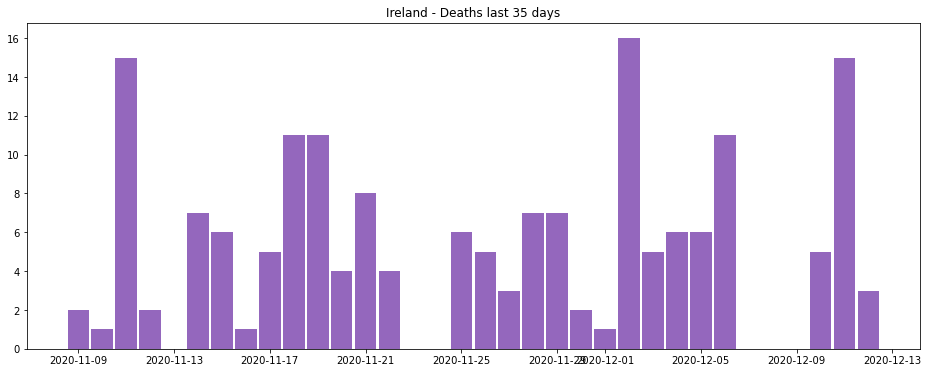

In [5]:
plt.rcParams["figure.figsize"] = (16,6)    # Create the Plot size
#plt.grid('on')    # turn on grid lines
#plt.xticks(rotation=xrot)    # rotate the xticks values to make them readable
plt.bar('dateRep', 'deaths', color='C{}'.format((i)%10), data=df1, width=w)
#plt.plot('dateRep', 'deaths_7_days', color='C{}'.format((j)%10), data=df1, linewidth=3)
#plt.xticks(np.arange(plt.xlim()[0], plt.xlim()[1], 5))
plt.title('{} - Deaths last {} days'.format(country, d))#
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

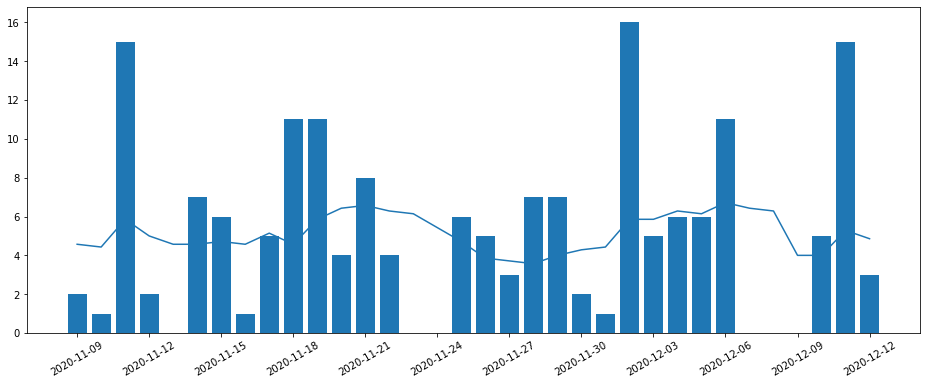

In [6]:
x = df1.dateRep.tolist()
y1 = df1.deaths.tolist()
y2 = df1.deaths_7_days.tolist()

plt.bar(x,y1)
plt.xticks(x[::3], rotation=30)
plt.plot(x,y2)
plt.show


In [7]:
y2

[4.571428571428571,
 4.428571428571429,
 5.857142857142857,
 5.0,
 4.571428571428571,
 4.571428571428571,
 4.714285714285714,
 4.571428571428571,
 5.142857142857143,
 4.571428571428571,
 5.857142857142857,
 6.428571428571429,
 6.571428571428571,
 6.285714285714286,
 6.142857142857143,
 5.428571428571429,
 4.714285714285714,
 3.857142857142857,
 3.7142857142857144,
 3.5714285714285716,
 4.0,
 4.285714285714286,
 4.428571428571429,
 5.857142857142857,
 5.857142857142857,
 6.285714285714286,
 6.142857142857143,
 6.714285714285714,
 6.428571428571429,
 6.285714285714286,
 4.0,
 4.0,
 5.285714285714286,
 4.857142857142857]

In [8]:
pd.to_datetime('today') - pd.offsets.DateOffset(days=60)

Timestamp('2020-10-14 08:16:20.254833')

In [9]:
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days,cases_stdev,deaths_stdev
27978,Ireland,2020-11-09,539,2,484.571429,4.571429,278.176614,2.943111
27977,Ireland,2020-11-10,265,1,415.571429,4.428571,287.469038,2.873524
27976,Ireland,2020-11-11,230,15,405.857143,5.857143,274.093163,3.183290
27975,Ireland,2020-11-12,358,2,394.857143,5.000000,253.885041,3.216772
27974,Ireland,2020-11-13,385,0,369.428571,4.571429,236.884420,3.355876
27973,Ireland,2020-11-14,467,7,365.857143,4.571429,233.183006,3.355876
27972,Ireland,2020-11-15,427,6,381.571429,4.714286,225.557785,3.370036
27971,Ireland,2020-11-16,377,1,358.428571,4.571429,199.847918,3.308719
27970,Ireland,2020-11-17,453,5,385.285714,5.142857,174.607124,3.288508
27969,Ireland,2020-11-18,330,11,399.571429,4.571429,170.982260,3.563706


In [10]:
0%10

0

In [11]:
df1 = get_country()
df1[-30:]

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days,cases_stdev,deaths_stdev
58009,United_Kingdom,2020-11-13,33470,563,23856.857143,401.142857,3054.880973,148.613417
58008,United_Kingdom,2020-11-14,27301,376,24430.285714,404.142857,3154.169757,147.741489
58007,United_Kingdom,2020-11-15,26860,462,24702.142857,411.142857,3254.905216,146.814963
58006,United_Kingdom,2020-11-16,24962,168,25329.285714,412.857143,3166.553993,145.796874
58005,United_Kingdom,2020-11-17,21363,213,25331.142857,415.571429,3147.970719,138.764394
58004,United_Kingdom,2020-11-18,20051,598,25279.571429,425.000000,3240.383053,149.700892
58003,United_Kingdom,2020-11-19,19609,529,24802.285714,415.571429,3333.924248,154.230116
58002,United_Kingdom,2020-11-20,22915,501,23294.428571,406.714286,3334.481353,155.896272
58001,United_Kingdom,2020-11-21,20252,511,22287.428571,426.000000,3384.345481,156.992781
58000,United_Kingdom,2020-11-22,19875,340,21289.571429,408.571429,3446.841708,156.765217


In [12]:
lista = pd.unique(df[['countriesAndTerritories', 'popData2019']].values.ravel())
for i in range(0, len(lista) - 1, 2):
    print(lista[i:i+2])

['Afghanistan' 38041757.0]
['Albania' 2862427.0]
['Algeria' 43053054.0]
['Andorra' 76177.0]
['Angola' 31825299.0]
['Anguilla' 14872.0]
['Antigua_and_Barbuda' 97115.0]
['Argentina' 44780675.0]
['Armenia' 2957728.0]
['Aruba' 106310.0]
['Australia' 25203200.0]
['Austria' 8858775.0]
['Azerbaijan' 10047719.0]
['Bahamas' 389486.0]
['Bahrain' 1641164.0]
['Bangladesh' 163046173.0]
['Barbados' 287021.0]
['Belarus' 9452409.0]
['Belgium' 11455519.0]
['Belize' 390351.0]
['Benin' 11801151.0]
['Bermuda' 62508.0]
['Bhutan' 763094.0]
['Bolivia' 11513102.0]
['Bonaire, Saint Eustatius and Saba' 25983.0]
['Bosnia_and_Herzegovina' 3300998.0]
['Botswana' 2303703.0]
['Brazil' 211049519.0]
['British_Virgin_Islands' 30033.0]
['Brunei_Darussalam' 433296.0]
['Bulgaria' 7000039.0]
['Burkina_Faso' 20321383.0]
['Burundi' 11530577.0]
['Cambodia' 16486542.0]
['Cameroon' 25876387.0]
['Canada' 37411038.0]
['Cape_Verde' 549936.0]
['Cases_on_an_international_conveyance_Japan' nan]
['Cayman_Islands' 64948.0]
['Central_Af

In [13]:
len(lista)
lista[0]

'Afghanistan'

In [14]:
pd.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [15]:
print(dataStamp.strftime("%d/%b/%Y, %H:%M:%S"))

13/Dec/2020, 08:16:08


In [16]:
#(dt.datetime.now() - startTime).strftime('%M minutes, %S seconds')
timeTaken = (dt.datetime.now() - startTime).total_seconds()
print("Started : {} \nEnded   : {}\nTook    : {} minutes, {} seconds".format(startTime, dt.datetime.now(), int(timeTaken // 60), int(timeTaken % 60)))

Started : 2020-12-13 08:16:03.576666 
Ended   : 2020-12-13 08:16:20.491200
Took    : 0 minutes, 16 seconds


In [17]:
timeTaken / 60 
int(timeTaken % 60)

16

In [18]:
#np.arange(df1.dateRep)
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days,cases_stdev,deaths_stdev
58327,United_Kingdom,2019-12-31,0,0,NaN,NaN,NaN,NaN
58326,United_Kingdom,2020-01-01,0,0,NaN,NaN,NaN,NaN
58325,United_Kingdom,2020-01-02,0,0,NaN,NaN,NaN,NaN
58324,United_Kingdom,2020-01-03,0,0,NaN,NaN,NaN,NaN
58323,United_Kingdom,2020-01-04,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57984,United_Kingdom,2020-12-08,14718,189,15471.857143,426.571429,3020.027151,165.340831
57983,United_Kingdom,2020-12-09,12281,599,15307.857143,426.000000,3043.872532,165.388072
57982,United_Kingdom,2020-12-10,16578,533,15366.142857,409.571429,2942.684657,165.495202
57981,United_Kingdom,2020-12-11,20964,516,16235.571429,424.142857,2737.877742,165.792527


In [19]:
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days,cases_stdev,deaths_stdev
58327,United_Kingdom,2019-12-31,0,0,NaN,NaN,NaN,NaN
58326,United_Kingdom,2020-01-01,0,0,NaN,NaN,NaN,NaN
58325,United_Kingdom,2020-01-02,0,0,NaN,NaN,NaN,NaN
58324,United_Kingdom,2020-01-03,0,0,NaN,NaN,NaN,NaN
58323,United_Kingdom,2020-01-04,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57984,United_Kingdom,2020-12-08,14718,189,15471.857143,426.571429,3020.027151,165.340831
57983,United_Kingdom,2020-12-09,12281,599,15307.857143,426.000000,3043.872532,165.388072
57982,United_Kingdom,2020-12-10,16578,533,15366.142857,409.571429,2942.684657,165.495202
57981,United_Kingdom,2020-12-11,20964,516,16235.571429,424.142857,2737.877742,165.792527
